# Task 31-> Dimensionality Reduction Techniques
Submitted by: Awais Anwer

Dimensionality reduction techniques simplify complex datasets, reduce computational costs, and help prevent overfitting in machine learning models. Common methods include Principal Component Analysis (PCA), which transforms data into principal components with the greatest variance; Linear Discriminant Analysis (LDA), which finds linear combinations of features that best separate classes; and t-Distributed Stochastic Neighbor Embedding (t-SNE), a non-linear technique for visualizing high-dimensional data. Other techniques include Independent Component Analysis (ICA) for separating a multivariate signal into independent components, and feature selection methods like SelectKBest and Recursive Feature Elimination (RFE). To see the impact of these techniques, pick a high-dimensional dataset and observe how the results of a model change when dimensionality reduction is applied. This will help you understand the effectiveness of each technique in improving model performance.

In [72]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [73]:
# Load the Adult dataset
data = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
df = data.frame

In [74]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [76]:
df.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


In [77]:
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

In [78]:
# Convert categorical columns to numerical values
df = pd.get_dummies(df, drop_first=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        45222 non-null  int64
 1   fnlwgt                                     45222 non-null  int64
 2   education-num                              45222 non-null  int64
 3   capital-gain                               45222 non-null  int64
 4   capital-loss                               45222 non-null  int64
 5   hours-per-week                             45222 non-null  int64
 6   workclass_Local-gov                        45222 non-null  bool 
 7   workclass_Never-worked                     45222 non-null  bool 
 8   workclass_Private                          45222 non-null  bool 
 9   workclass_Self-emp-inc                     45222 non-null  bool 
 10  workclass_Self-emp-not-inc                 45222 no

In [80]:
X = df.drop('class_>50K', axis=1)
y = df['class_>50K']

In [81]:
# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [82]:
# removing constant features
constant_filter = VarianceThreshold(threshold=0)
X = constant_filter.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# A function to evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, technique_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {technique_name}: {accuracy:.4f}")

### 1. Original data

In [86]:
evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, "Original Data")

Accuracy with Original Data: 0.8512


### 2. PCA

In [87]:
pca = PCA(n_components=50)  # Reduce to 50 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
evaluate_model(X_train_pca, X_test_pca, y_train, y_test, "PCA")

Accuracy with PCA: 0.8392


### 3. LDA

In [88]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
evaluate_model(X_train_lda, X_test_lda, y_train, y_test, "LDA")

Accuracy with LDA: 0.7801


### 4. SelectKBest

In [89]:
selector = SelectKBest(f_classif, k=50)  # Selecting top 50 features
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)
evaluate_model(X_train_kbest, X_test_kbest, y_train, y_test, "SelectKBest")

Accuracy with SelectKBest: 0.8431


### 5. tSNE

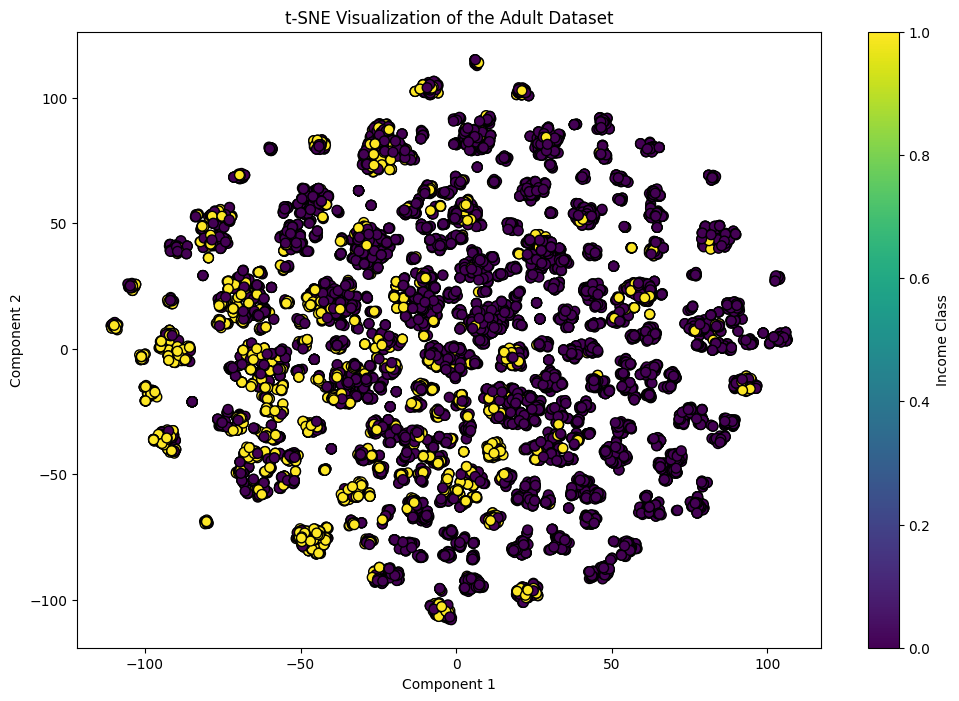

In [93]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test_scaled)

# DataFrame for visualization
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Target'] = y_test

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], c=tsne_df['Target'], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='Income Class')
plt.title("t-SNE Visualization of the Adult Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()